In [161]:
##################################Problem statement ##################################
# We want to predict survial changes of a given set of passangers out of Titanic data based on Age, Sex, Fare, Passanger Class.
# This is a classification problem we plan to solve.

# Import the Titanic Data
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

df = pd.read_csv('titanic.csv')
titanic_df=df[['Survived','Pclass','Sex','Age','Fare']]
titanic_df.count()
#titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 0})



Survived    891
Pclass      891
Sex         891
Age         714
Fare        891
dtype: int64

In [162]:

##for col_name in titanic_df.columns:
##  print(col_name, titanic_df[col_name].nunique())

Survived 2
Pclass 3
Sex 2
Age 88
Fare 219


Survived
0    418
1    289
Name: count, dtype: int64

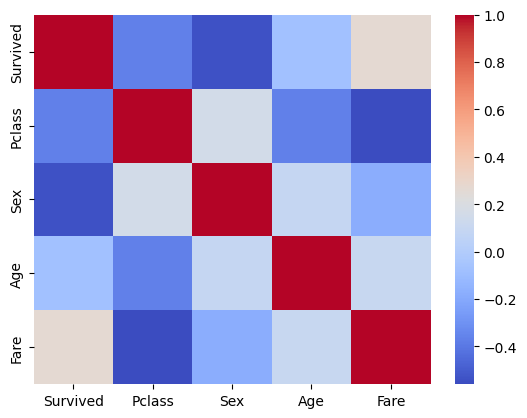

In [163]:
################################### Exploratory Data Analysis, Clensing & transforming of Titanic Data ##################################
# 1. Identify any null values  - We see there are 177 rows with null age values
titanic_df.isnull().sum()

# 2. Remove the null rows from the data
titanic_df = titanic_df.dropna(how='any',axis=0)

#. 3. Removing the Zero Values from the Fare Column, we observed that there are 15 rows with 0 Fares.
  # Drop rows with Fare values of 0
titanic_df = titanic_df[titanic_df['Fare'] > 0]

# 3. Tranforming Sex Label column into encoding. - We conclude that data do not correlate
  # Initialize LabelEncoder
label_encoder = LabelEncoder()
  # Fit label encoder and transform gender column
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])

# 4. Evaluating the correlation between the data sets. - The features do not correlate
corrValue=titanic_df.corr()
sns.heatmap(corrValue, cmap='coolwarm')


# 5. Identifying Unique values for columns. We found out that Pclass, Survived, Sex have unique values
for col_name in titanic_df.columns:
  print(col_name, titanic_df[col_name].nunique())

#6. Analyze data balance survival vs non-survival data count - We see there is 290 Passengers survived & 424 have not survied.
# We plan to balance our data set using class weight param set while training

titanic_df['Survived'].value_counts()
#sns.countplot(titanic_df['Survived'])

In [164]:
##################################Train, Test & Predicting the data ####################################################################
x=titanic_df.drop('Survived',axis=1)
y=titanic_df['Survived']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(xtrain, ytrain) # training the model
p = model.predict(xtest) # get the predictions


accscore = accuracy_score(p, ytest) #  matching the predicitions against values we already know
print('The accuracy score is = ' + str(accscore * 100) + ' %')
f1 = f1_score(p, ytest)
print('The F1 score is = ' + str(f1 * 100) + ' %')
p_score =precision_score(p, ytest)
print('The precision score is = ' + str(p_score * 100) + ' %')
r_rcore = recall_score(p, ytest)
print('The recall score is = ' + str(r_rcore * 100) + ' %')

The accuracy score is = 82.62910798122066 %
The F1 score is = 77.01863354037268 %
The precision score is = 77.5 %
The recall score is = 76.5432098765432 %


In [165]:
################################## Evaluating all other Models ####################################################################
mymodels = {
    'DecisionTreeDefault': DecisionTreeClassifier(),
    'DecisionTree200' : DecisionTreeClassifier(max_depth=200),
    'DecisionTree100' : DecisionTreeClassifier(max_depth=100),
    'RandomForestDefault': RandomForestClassifier(),
    'RF-200' : RandomForestClassifier(n_estimators=200),
    'RF-100' : RandomForestClassifier(n_estimators=100),
    'RF-500' : RandomForestClassifier(n_estimators=500),
    'KNN-5' : KNeighborsClassifier(n_neighbors=5),
    'KNN-10' : KNeighborsClassifier(n_neighbors=10),
    'KNN-15' : KNeighborsClassifier(n_neighbors=15),
    'Logistic Regression' : LogisticRegression(),
    'SVM' : SVC(),
    'Naive Bayes' : GaussianNB(),
    'SGD' : SGDClassifier()
}

best_algo_acc = { 'No Algo': None}
best_acc = 0.0
best_algo_precision = { 'No Algo': None}
best_precision = 0.0
best_algo_recall = { 'No Algo': None}
best_recall = 0.0
best_algo_f1score = { 'No Algo': None}
best_f1_score = 0.0

for algoname, algo in mymodels.items():
  algo.fit(xtrain, ytrain)
  p = algo.predict(xtest)
  accscore = accuracy_score(p, ytest)
  if accscore > best_acc and accscore != 1.0:
    best_acc = accscore
    best_algo_acc = { algoname : algo}
  prec = precision_score(p, ytest)
  if prec > best_precision and prec != 1.0:
    best_precision = prec
    best_algo_precision = { algoname : algo}
  rec = recall_score(p, ytest)
  if rec > best_recall and rec != 1.0:
    best_recall = rec
    best_algo_recall = { algoname : algo}
  f1 = f1_score(p, ytest)
  if f1 > best_f1_score and f1 != 1.0:
    best_f1_score = f1
    best_algo_f1score = { algoname : algo}

print("Best Algo Accuracy", best_algo_acc,"-->", best_acc.round(2),"\n")
print("Best Algo Precision",best_algo_precision, "-->",best_precision.round(2),"\n")
print("Best_algo_Recall",best_algo_recall, "-->",best_recall.round(2),"\n")
print("Best_Algo_f1score",best_algo_f1score, "-->",best_f1_score.round(2),"\n")


Best Algo Accuracy {'Logistic Regression': LogisticRegression()} --> 0.83 

Best Algo Precision {'SGD': SGDClassifier()} --> 0.88 

Best_algo_Recall {'RF-500': RandomForestClassifier(n_estimators=500)} --> 0.78 

Best_Algo_f1score {'Logistic Regression': LogisticRegression()} --> 0.77 



#########################################Conclusion #################################
**bold text**
We conclude that best classification model for Titatanic data analysis is -->Logistic Regression considering its F1 Score

################################################################################

In [166]:
model_weighted=LogisticRegression(class_weight={0:0.7,1:1})
model_weighted.fit(xtrain, ytrain) # training the model
p = model_weighted.predict(xtest) # get the predictions


accscore = accuracy_score(p, ytest) #  matching the predicitions against values we already know
print('The accuracy score is = ' + str(accscore * 100) + ' %')
f1 = f1_score(p, ytest)
print('The F1 score is = ' + str(f1 * 100) + ' %')
p_score =precision_score(p, ytest)
print('The precision score is = ' + str(p_score * 100) + ' %')
r_rcore = recall_score(p, ytest)
print('The recall score is = ' + str(r_rcore * 100) + ' %')

mymodels = {
    'DecisionTreeDefault': DecisionTreeClassifier(),
    'DecisionTree200' : DecisionTreeClassifier(max_depth=200),
    'DecisionTree100' : DecisionTreeClassifier(max_depth=100),
    'RandomForestDefault': RandomForestClassifier(),
    'RF-200' : RandomForestClassifier(n_estimators=200),
    'RF-100' : RandomForestClassifier(n_estimators=100),
    'RF-500' : RandomForestClassifier(n_estimators=500),
    'KNN-5' : KNeighborsClassifier(n_neighbors=5),
    'KNN-10' : KNeighborsClassifier(n_neighbors=10),
    'KNN-15' : KNeighborsClassifier(n_neighbors=15),
    'Logistic Regression' : LogisticRegression(class_weight={0:0.5,1:1}),
    'SVM' : SVC(),
    'Naive Bayes' : GaussianNB(),
    'SGD' : SGDClassifier()
}

best_algo_acc = { 'No Algo': None}
best_acc = 0.0
best_algo_precision = { 'No Algo': None}
best_precision = 0.0
best_algo_recall = { 'No Algo': None}
best_recall = 0.0
best_algo_f1score = { 'No Algo': None}
best_f1_score = 0.0

for algoname, algo in mymodels.items():
  algo.fit(xtrain, ytrain)
  p = algo.predict(xtest)
  accscore = accuracy_score(p, ytest)
  if accscore > best_acc and accscore != 1.0:
    best_acc = accscore
    best_algo_acc = { algoname : algo}
  prec = precision_score(p, ytest)
  if prec > best_precision and prec != 1.0:
    best_precision = prec
    best_algo_precision = { algoname : algo}
  rec = recall_score(p, ytest)
  if rec > best_recall and rec != 1.0:
    best_recall = rec
    best_algo_recall = { algoname : algo}
  f1 = f1_score(p, ytest)
  if f1 > best_f1_score and f1 != 1.0:
    best_f1_score = f1
    best_algo_f1score = { algoname : algo}

print("Best Algo Accuracy", best_algo_acc,"-->", best_acc.round(2),"\n")
print("Best Algo Precision",best_algo_precision, "-->",best_precision.round(2),"\n")
print("Best_algo_Recall",best_algo_recall, "-->",best_recall.round(2),"\n")
print("Best_Algo_f1score",best_algo_f1score, "-->",best_f1_score.round(2),"\n")


The accuracy score is = 81.2206572769953 %
The F1 score is = 77.01149425287356 %
The precision score is = 83.75 %
The recall score is = 71.27659574468085 %
Best Algo Accuracy {'RF-100': RandomForestClassifier()} --> 0.84 

Best Algo Precision {'Logistic Regression': LogisticRegression(class_weight={0: 0.5, 1: 1})} --> 0.84 

Best_algo_Recall {'RF-100': RandomForestClassifier()} --> 0.81 

Best_Algo_f1score {'RF-100': RandomForestClassifier()} --> 0.77 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
#########Trying out Evaluation after normalization, just to see if normalization works####
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

mu = xtrain.describe().T['mean']
sigma = xtrain.describe().T['std']

xtrain_norm = (xtrain-mu)/sigma
xtest_norm = (xtest - mu)/sigma

model_norm = LogisticRegression()
model_norm.fit(xtrain_norm, ytrain) # training the model
p = model_norm.predict(xtest_norm) # get the predictions

accscore = accuracy_score(p, ytest) #  matching the predicitions against values we already know
print('The accuracy score is = ' + str(accscore * 100) + ' %')
f1 = f1_score(p, ytest)
print('The F1 score is = ' + str(f1 * 100) + ' %')
p_score =precision_score(p, ytest)
print('The precision score is = ' + str(p_score * 100) + ' %')
r_rcore = recall_score(p, ytest)
print('The recall score is = ' + str(r_rcore * 100) + ' %')

The accuracy score is = 82.62910798122066 %
The F1 score is = 77.01863354037268 %
The precision score is = 77.5 %
The recall score is = 76.5432098765432 %
